#### DataSet of heoghts of Male and Female
##### Problem Statment. Lets find who is taller Male or Female irrespective of their genes at Birth?

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [90]:
data_Weiht_Height = pd.read_csv('./Data/weight-height2.csv')
data_Weiht_Height.head(5)

,Gender,Height,Weight
0,Male,173.847017,241.893563
1,Male,268.781904,162.310473
2,Male,374.110105,212.740856
3,Male,771.730978,220.042470
4,Male,269.881796,206.349801


In [91]:
data_Weiht_Height.shape

(10000, 3)

In [92]:
data_Weiht_Height.Gender.value_counts(dropna=False)

Male      5000
Female    5000
Name: Gender, dtype: int64

##### Seperating the Male and Female Date

In [93]:
dataMale = data_Weiht_Height[data_Weiht_Height['Gender'] == 'Male']
dataMale

,Gender,Height,Weight
0,Male,173.847017,241.893563
1,Male,268.781904,162.310473
2,Male,374.110105,212.740856
3,Male,771.730978,220.042470
4,Male,269.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905910


In [94]:
dataFeMale = data_Weiht_Height[data_Weiht_Height['Gender'] != 'Male']
dataFeMale

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [95]:
dataFeMale.Gender.value_counts(dropna=False)

Female    5000
Name: Gender, dtype: int64

In [96]:
dataMale.Gender.value_counts(dropna=False)

Male    5000
Name: Gender, dtype: int64

##### Working with Male Data

<AxesSubplot: xlabel='Height', ylabel='Count'>

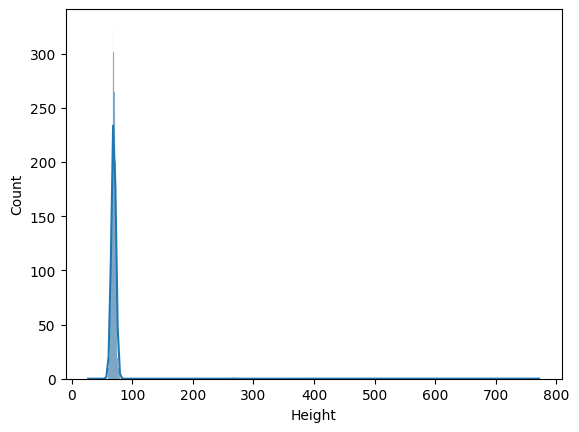

In [97]:
sns.histplot(dataMale.Height, kde= True)

##### This is clearly not a normal distribution so lets work on the outliars and make it a normal distribution

In [98]:
meanMaleHeight  = dataMale.Height.mean()
meanMaleHeight

69.406345906276

In [99]:
stdMaleHeight  = dataMale.Height.std()
stdMaleHeight

13.019072208010867

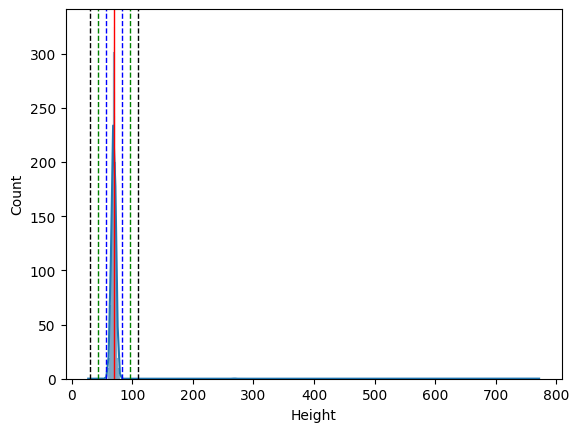

In [100]:
sns.histplot(dataMale.Height, kde= True)
plt.axvline(meanMaleHeight, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanMaleHeight + stdMaleHeight, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - stdMaleHeight, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanMaleHeight + 2* stdMaleHeight, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - 2* stdMaleHeight, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanMaleHeight + 3* stdMaleHeight, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - 3* stdMaleHeight, color='black',linestyle = 'dashed', linewidth =1)




##### Now lets verify if we have a good dispation of data based on the mean and std calculated.  

In [106]:
l1 = round(meanMaleHeight - stdMaleHeight,2)
r1 = round(meanMaleHeight + stdMaleHeight,2)
l1, r1

(56.39, 82.43)

In [ ]:
# l1,r1 = meanMaleHeight - stdMaleHeight, meanMaleHeight + stdMaleHeight
# l1,r1 

In [107]:
l2 = round(meanMaleHeight - 2*stdMaleHeight,2)
r2 = round(meanMaleHeight + 2* stdMaleHeight,2)
l2, r2

(43.37, 95.44)

In [108]:
l3 = round(meanMaleHeight - 3*stdMaleHeight,6)
r3 = round(meanMaleHeight + 3* stdMaleHeight,6)
l3, r3

(30.349129, 108.463563)

In [109]:
(dataMale[(dataMale.Height>l1)&(dataMale.Height<r1)].shape[0]/dataMale.shape[0])*100

99.8

In [110]:
(dataMale[(dataMale.Height>l2)&(dataMale.Height<r2)].shape[0]/dataMale.shape[0])*100

99.82

In [111]:
(dataMale[(dataMale.Height>l3)&(dataMale.Height<r3)].shape[0]/dataMale.shape[0])*100

99.83999999999999

##### This Variation shows there are some extreem Outliars

In [112]:
validMaleData = dataMale[(dataMale.Height>l3)&(dataMale.Height<r3)]
validMaleData

,Gender,Height,Weight
6,Male,48.785081,183.927889
7,Male,58.348516,167.971111
10,Male,41.195382,186.604926
11,Male,71.640805,213.741170
12,Male,64.766329,167.127461
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905910


<AxesSubplot: xlabel='Height', ylabel='Count'>

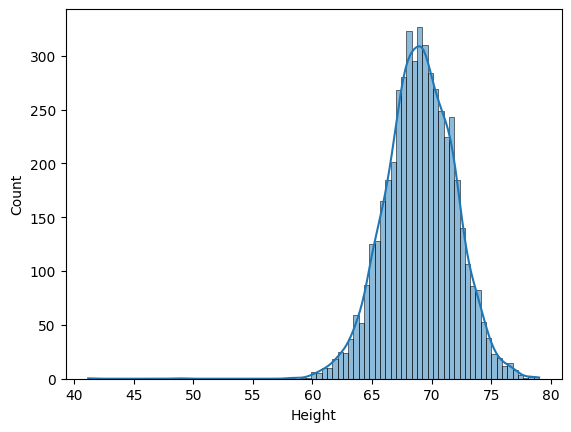

In [114]:
sns.histplot(validMaleData.Height, kde= True)

In [115]:
meanMaleHeight  = validMaleData.Height.mean()
meanMaleHeight

69.01355153672276

In [116]:
stdMaleHeight  = validMaleData.Height.std()
stdMaleHeight

2.907196027316051

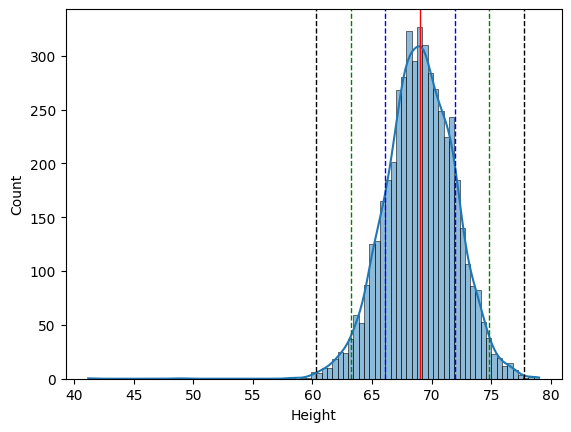

In [121]:
sns.histplot(validMaleData.Height, kde= True)
plt.axvline(meanMaleHeight, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanMaleHeight + stdMaleHeight, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - stdMaleHeight, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanMaleHeight + 2* stdMaleHeight, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - 2* stdMaleHeight, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanMaleHeight + 3* stdMaleHeight, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - 3* stdMaleHeight, color='black',linestyle = 'dashed', linewidth =1)




##### Lets check the Max and Min values and work with them

In [118]:
l1 = round(meanMaleHeight - stdMaleHeight,2)
r1 = round(meanMaleHeight + stdMaleHeight,2)
l1, r1

(66.11, 71.92)

In [119]:
l2 = round(meanMaleHeight - 2*stdMaleHeight,2)
r2 = round(meanMaleHeight + 2*stdMaleHeight,2)
l2, r2

(63.2, 74.83)

In [125]:
l3 = round(meanMaleHeight - 3*stdMaleHeight,9)
r3 = round(meanMaleHeight + 3*stdMaleHeight,9)
l3, r3

(60.291963455, 77.735139619)

##### l3 and r3 are the min and ma of the data

In [126]:
l3, r3

(60.291963455, 77.735139619)

In [127]:
(validMaleData[(validMaleData.Height>l1)&(validMaleData.Height<r1)].shape[0]/validMaleData.shape[0])*100

69.53125

In [142]:
(validMaleData[(validMaleData.Height>l2)&(validMaleData.Height<r2)].shape[0]/validMaleData.shape[0])*100

95.59294871794873

In [143]:
(validMaleData[(validMaleData.Height>l3)&(validMaleData.Height<r3)].shape[0]/validMaleData.shape[0])*100

99.61939102564102

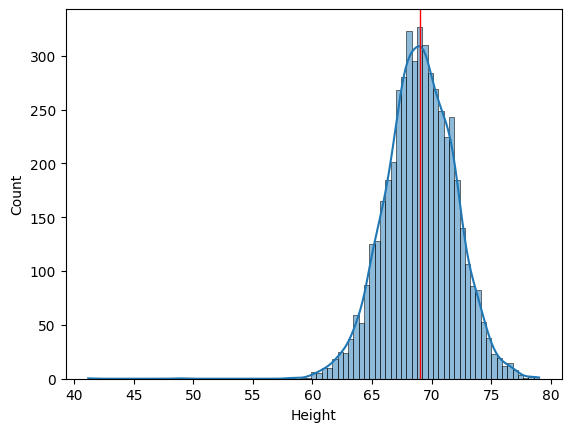

In [144]:
sns.histplot(validMaleData.Height, kde= True)
plt.axvline(meanMaleHeight, color='r',linestyle = 'solid',linewidth =1)

##### This shows we still have some extrem Outliars Based on the Graph

In [ ]:
#####

In [146]:
validMaleData2 = validMaleData[(validMaleData.Height>l3)&(validMaleData.Height<r3)]
validMaleData2

,Gender,Height,Weight
11,Male,71.640805,213.741170
12,Male,64.766329,167.127461
13,Male,69.283070,189.446181
14,Male,69.243732,186.434168
15,Male,67.645620,172.186930
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905910


In [149]:
validMaleData2 = validMaleData[(validMaleData.Height>=l3)&(validMaleData.Height<=r3)]
validMaleData2

,Gender,Height,Weight
11,Male,71.640805,213.741170
12,Male,64.766329,167.127461
13,Male,69.283070,189.446181
14,Male,69.243732,186.434168
15,Male,67.645620,172.186930
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905910


In [150]:
meanMaleHeight = validMaleData2.Height.mean()
meanMaleHeight

69.03240103870701

In [151]:
stdMaleHeight = validMaleData2.Height.std()
stdMaleHeight

2.8193910761081864

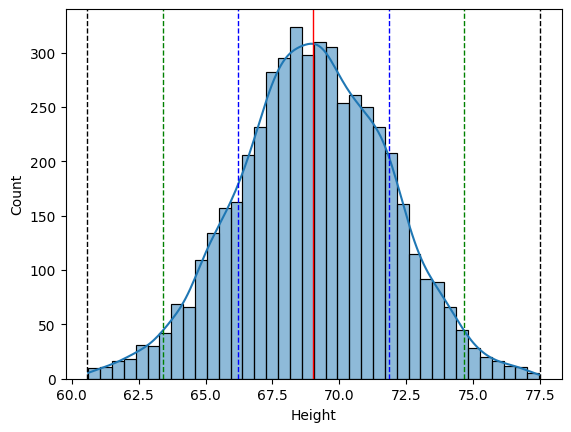

In [152]:
sns.histplot(validMaleData2.Height, kde= True)
plt.axvline(meanMaleHeight, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanMaleHeight + stdMaleHeight, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - stdMaleHeight, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanMaleHeight + 2* stdMaleHeight, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - 2* stdMaleHeight, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanMaleHeight + 3* stdMaleHeight, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanMaleHeight - 3* stdMaleHeight, color='black',linestyle = 'dashed', linewidth =1)




In [ ]:
# (60.56, 77.5)

In [153]:
l3 = round(meanMaleHeight - 3*stdMaleHeight,2)
r3 = round(meanMaleHeight + 3*stdMaleHeight,2)
l3, r3

(60.57, 77.49)

In [154]:
(validMaleData2[(validMaleData2.Height>l1)&(validMaleData2.Height<r1)].shape[0]/validMaleData2.shape[0])*100

69.79690327769957

In [155]:
(validMaleData2[(validMaleData2.Height>l2)&(validMaleData2.Height<r2)].shape[0]/validMaleData2.shape[0])*100

95.95817414035793

In [156]:
(validMaleData2[(validMaleData2.Height>l3)&(validMaleData2.Height<r3)].shape[0]/validMaleData2.shape[0])*100

100.0

##### r1 should be 64 - 69%, r2 should be 96-98% and r3 should be 99.9% for a normal distribution when outliars are removed

In [157]:
(validMaleData2[(validMaleData2.Height>=l3)&(validMaleData2.Height<=r3)].shape[0]/validMaleData2.shape[0])*100

100.0

In [158]:
maleOutliars  = validMaleData2[(validMaleData2.Height<=l3)|(validMaleData2.Height>=r3)]
maleOutliars

,Gender,Height,Weight


In [159]:
maleOutliars  = dataMale[(dataMale.Height<=l3)|(dataMale.Height>=r3)]
maleOutliars

,Gender,Height,Weight
0,Male,173.847017,241.893563
1,Male,268.781904,162.310473
2,Male,374.110105,212.740856
3,Male,771.730978,220.042470
4,Male,269.881796,206.349801
5,Male,267.253016,152.212156
6,Male,48.785081,183.927889
7,Male,58.348516,167.971111
8,Male,27.018950,175.929440
9,Male,363.456494,156.399676


In [160]:
maleOutliars.shape

(27, 3)

In [ ]:
## Just Muna 

In [161]:
data_Weiht_Height_Original = pd.read_csv('./Data/weight-height.csv')
data_Weiht_Height_Original.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
